**Problem Description**: In allocating the incomplete haiku, we face issue of "swipes". The given dataset is particular use-case for line 3. We have to minimize the swipes, so that as a user you add to first jam you see on the screen. 

Target=0 means user swiped away the line and target=1 means he added to the line. 

In [0]:
!wget "https://haikutestbucket.s3-us-west-2.amazonaws.com/yash/train_line3(Int).csv"
import pandas as pd

--2019-10-21 08:58:14--  https://haikutestbucket.s3-us-west-2.amazonaws.com/yash/train_line3(Int).csv
Resolving haikutestbucket.s3-us-west-2.amazonaws.com (haikutestbucket.s3-us-west-2.amazonaws.com)... 52.218.201.185
Connecting to haikutestbucket.s3-us-west-2.amazonaws.com (haikutestbucket.s3-us-west-2.amazonaws.com)|52.218.201.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61894478 (59M) [text/csv]
Saving to: ‘train_line3(Int).csv.1’

train_line3(Int).cs 100%[===================>]  59.03M  19.2MB/s    in 3.9s    

2019-10-21 08:58:19 (15.1 MB/s) - ‘train_line3(Int).csv.1’ saved [61894478/61894478]



### Data Cleaning



In [0]:
import pandas as pd

In [0]:
X = pd.read_csv('train_line3(Int).csv')

In [0]:
X.shape

(450371, 21)

In [0]:
X.columns

Index(['shuffle.timeStamp', 'commentCount', 'likeCount', 'dlScore',
       'spellScore', 'line1.timeStamp', 'line2.timeStamp', 'readCount',
       'target', 'gender.line1', 'likeCount.line1', 'haikuCount.line1',
       'spellScore.line1', 'gender.line2', 'likeCount.line2',
       'haikuCount.line2', 'spellScore.line2', 'gender.line3',
       'likeCount.line3', 'haikuCount.line3', 'spellScore.line3'],
      dtype='object')

In [0]:
X.describe()


,shuffle.timeStamp,commentCount,likeCount,dlScore,spellScore,line1.timeStamp,line2.timeStamp,readCount,target,gender.line1,likeCount.line1,haikuCount.line1,spellScore.line1,gender.line2,likeCount.line2,haikuCount.line2,spellScore.line2,gender.line3,likeCount.line3,haikuCount.line3,spellScore.line3
count,4.503710e+05,450371.000000,450371.000000,450371.000000,450371.000000,4.503710e+05,4.503710e+05,450371.000000,450371.000000,450292.000000,450371.000000,450371.000000,450371.000000,450371.000000,450371.000000,450371.000000,450371.000000,443234.000000,443292.000000,443292.000000,443292.000000
mean,1.570940e+12,0.100104,1.625422,0.415357,0.019288,1.570930e+12,1.570938e+12,4.148897,0.165712,1.452311,28693.258087,13934.487680,0.002632,1.563871,16145.682546,6634.034834,0.003328,1.503896,9615.699022,3968.200279,0.003975
std,1.181776e+08,0.514589,2.388452,0.213272,0.072304,1.195040e+08,1.185109e+08,18.360614,0.371823,0.697735,57828.276651,25913.732799,0.018415,0.683450,43590.294442,17321.748381,0.019973,0.710807,34181.834240,13057.917281,0.020198
min,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.570720e+12,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.570848e+12,0.000000,1.000000,0.250000,0.000000,1.570820e+12,1.570844e+12,1.000000,0.000000,1.000000,475.000000,321.000000,0.000000,1.000000,172.000000,128.000000,0.000000,1.000000,196.000000,137.000000,0.000000
50%,1.570951e+12,0.000000,2.000000,0.380000,0.000000,1.570938e+12,1.570949e+12,3.000000,0.000000,2.000000,3437.000000,1973.000000,0.000000,2.000000,1062.000000,669.000000,0.000000,2.000000,869.000000,551.000000,0.000000
75%,1.571048e+12,0.000000,2.000000,0.540000,0.000000,1.571039e+12,1.571046e+12,5.000000,0.000000,2.000000,25878.000000,11281.000000,0.000000,2.000000,7131.000000,3991.000000,0.000000,2.000000,4031.000000,2189.000000,0.000048
max,1.571145e+12,72.000000,321.000000,0.990000,0.916314,1.571144e+12,1.571145e+12,2798.000000,1.000000,3.000000,404048.000000,156300.000000,0.562963,3.000000,540556.000000,156300.000000,1.000000,3.000000,540556.000000,156300.000000,0.562963


In [0]:
X['time_line2_took']=X['line2.timeStamp']-X['line1.timeStamp']

In [0]:
X.columns

Index(['shuffle.timeStamp', 'commentCount', 'likeCount', 'dlScore',
       'spellScore', 'line1.timeStamp', 'line2.timeStamp', 'readCount',
       'target', 'gender.line1', 'likeCount.line1', 'haikuCount.line1',
       'spellScore.line1', 'gender.line2', 'likeCount.line2',
       'haikuCount.line2', 'spellScore.line2', 'gender.line3',
       'likeCount.line3', 'haikuCount.line3', 'spellScore.line3',
       'time_line2_took'],
      dtype='object')

In [0]:
X['time_line2_took'].count()

450371

In [0]:
len(X[X['time_line2_took']<0])

7

In [0]:
X=X[X['time_line2_took']>=0]

In [0]:
X.count()

shuffle.timeStamp    450364
commentCount         450364
likeCount            450364
dlScore              450364
spellScore           450364
line1.timeStamp      450364
line2.timeStamp      450364
readCount            450364
target               450364
gender.line1         450285
likeCount.line1      450364
haikuCount.line1     450364
spellScore.line1     450364
gender.line2         450364
likeCount.line2      450364
haikuCount.line2     450364
spellScore.line2     450364
gender.line3         443228
likeCount.line3      443286
haikuCount.line3     443286
spellScore.line3     443286
time_line2_took      450364
dtype: int64

In [0]:
len(X[X.isnull().any(axis=1)])

7213

In [0]:
len(X[X.isnull().any(axis=1)==False])

443151

In [0]:
X=X[X.isnull().any(axis=1)==False]

In [0]:
X['time_2line_hiku_shown']=X['shuffle.timeStamp']-X['line2.timeStamp']

No Of samples with -ve value for column 'time_line2_took'

In [0]:
X.count()

shuffle.timeStamp        443151
commentCount             443151
likeCount                443151
dlScore                  443151
spellScore               443151
line1.timeStamp          443151
line2.timeStamp          443151
readCount                443151
target                   443151
gender.line1             443151
likeCount.line1          443151
haikuCount.line1         443151
spellScore.line1         443151
gender.line2             443151
likeCount.line2          443151
haikuCount.line2         443151
spellScore.line2         443151
gender.line3             443151
likeCount.line3          443151
haikuCount.line3         443151
spellScore.line3         443151
time_line2_took          443151
time_2line_hiku_shown    443151
dtype: int64

In [0]:
len(X[X['time_2line_hiku_shown']<0])

12675

In [0]:
X=X[X['time_2line_hiku_shown']>=0]

In [0]:
X.count()

shuffle.timeStamp        430476
commentCount             430476
likeCount                430476
dlScore                  430476
spellScore               430476
line1.timeStamp          430476
line2.timeStamp          430476
readCount                430476
target                   430476
gender.line1             430476
likeCount.line1          430476
haikuCount.line1         430476
spellScore.line1         430476
gender.line2             430476
likeCount.line2          430476
haikuCount.line2         430476
spellScore.line2         430476
gender.line3             430476
likeCount.line3          430476
haikuCount.line3         430476
spellScore.line3         430476
time_line2_took          430476
time_2line_hiku_shown    430476
dtype: int64

In [0]:
X=X.drop_duplicates()

In [0]:
X.count()

shuffle.timeStamp        418287
commentCount             418287
likeCount                418287
dlScore                  418287
spellScore               418287
line1.timeStamp          418287
line2.timeStamp          418287
readCount                418287
target                   418287
gender.line1             418287
likeCount.line1          418287
haikuCount.line1         418287
spellScore.line1         418287
gender.line2             418287
likeCount.line2          418287
haikuCount.line2         418287
spellScore.line2         418287
gender.line3             418287
likeCount.line3          418287
haikuCount.line3         418287
spellScore.line3         418287
time_line2_took          418287
time_2line_hiku_shown    418287
dtype: int64

In [0]:
X.describe()

,shuffle.timeStamp,commentCount,likeCount,dlScore,spellScore,line1.timeStamp,line2.timeStamp,readCount,target,gender.line1,likeCount.line1,haikuCount.line1,spellScore.line1,gender.line2,likeCount.line2,haikuCount.line2,spellScore.line2,gender.line3,likeCount.line3,haikuCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown
count,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,4.182870e+05,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,4.182870e+05,4.182870e+05
mean,1.570940e+12,0.099910,1.612314,0.414699,0.019009,1.570930e+12,1.570939e+12,4.109695,0.168743,1.452266,28503.986846,13859.041708,0.002643,1.562810,16073.840915,6611.630787,0.003276,1.505811,9577.028648,3952.711239,0.003896,8.612036e+06,1.735191e+06
std,1.176704e+08,0.497762,2.191132,0.212870,0.071739,1.189382e+08,1.179594e+08,17.041482,0.374525,0.697692,57487.085006,25817.379212,0.018453,0.684084,43563.385493,17323.446770,0.019544,0.710508,34169.293509,13053.160619,0.019695,2.879272e+07,9.142197e+06
min,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.570720e+12,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.570849e+12,0.000000,1.000000,0.250000,0.000000,1.570821e+12,1.570846e+12,1.000000,0.000000,1.000000,469.000000,317.000000,0.000000,1.000000,172.000000,128.000000,0.000000,1.000000,195.000000,136.000000,0.000000,5.359900e+05,5.365900e+04
50%,1.570950e+12,0.000000,2.000000,0.370000,0.000000,1.570937e+12,1.570949e+12,3.000000,0.000000,2.000000,3403.000000,1934.000000,0.000000,2.000000,1053.000000,663.000000,0.000000,2.000000,853.000000,543.000000,0.000000,1.360798e+06,4.941010e+05
75%,1.571047e+12,0.000000,2.000000,0.540000,0.000000,1.571037e+12,1.571045e+12,5.000000,0.000000,2.000000,25650.000000,11281.000000,0.000000,2.000000,7131.000000,3986.000000,0.000000,2.000000,3924.000000,2173.000000,0.000051,2.218434e+06,1.745178e+06
max,1.571145e+12,72.000000,321.000000,0.990000,0.916314,1.571144e+12,1.571145e+12,2719.000000,1.000000,3.000000,404048.000000,156300.000000,0.562963,3.000000,540556.000000,156300.000000,1.000000,3.000000,540556.000000,156300.000000,0.562963,3.977058e+08,3.956751e+08


### Normalize Features


In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from numpy import array
import numpy as np

skfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [0]:
X.columns

Index(['shuffle.timeStamp', 'commentCount', 'likeCount', 'dlScore',
       'spellScore', 'line1.timeStamp', 'line2.timeStamp', 'readCount',
       'target', 'gender.line1', 'likeCount.line1', 'haikuCount.line1',
       'spellScore.line1', 'gender.line2', 'likeCount.line2',
       'haikuCount.line2', 'spellScore.line2', 'gender.line3',
       'likeCount.line3', 'haikuCount.line3', 'spellScore.line3',
       'time_line2_took', 'time_2line_hiku_shown'],
      dtype='object')

In [0]:
X.describe()

,shuffle.timeStamp,commentCount,likeCount,dlScore,spellScore,line1.timeStamp,line2.timeStamp,readCount,target,gender.line1,likeCount.line1,haikuCount.line1,spellScore.line1,gender.line2,likeCount.line2,haikuCount.line2,spellScore.line2,gender.line3,likeCount.line3,haikuCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown
count,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,4.182870e+05,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,4.182870e+05,4.182870e+05
mean,1.570940e+12,0.099910,1.612314,0.414699,0.019009,1.570930e+12,1.570939e+12,4.109695,0.168743,1.452266,28503.986846,13859.041708,0.002643,1.562810,16073.840915,6611.630787,0.003276,1.505811,9577.028648,3952.711239,0.003896,8.612036e+06,1.735191e+06
std,1.176704e+08,0.497762,2.191132,0.212870,0.071739,1.189382e+08,1.179594e+08,17.041482,0.374525,0.697692,57487.085006,25817.379212,0.018453,0.684084,43563.385493,17323.446770,0.019544,0.710508,34169.293509,13053.160619,0.019695,2.879272e+07,9.142197e+06
min,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.570720e+12,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.570849e+12,0.000000,1.000000,0.250000,0.000000,1.570821e+12,1.570846e+12,1.000000,0.000000,1.000000,469.000000,317.000000,0.000000,1.000000,172.000000,128.000000,0.000000,1.000000,195.000000,136.000000,0.000000,5.359900e+05,5.365900e+04
50%,1.570950e+12,0.000000,2.000000,0.370000,0.000000,1.570937e+12,1.570949e+12,3.000000,0.000000,2.000000,3403.000000,1934.000000,0.000000,2.000000,1053.000000,663.000000,0.000000,2.000000,853.000000,543.000000,0.000000,1.360798e+06,4.941010e+05
75%,1.571047e+12,0.000000,2.000000,0.540000,0.000000,1.571037e+12,1.571045e+12,5.000000,0.000000,2.000000,25650.000000,11281.000000,0.000000,2.000000,7131.000000,3986.000000,0.000000,2.000000,3924.000000,2173.000000,0.000051,2.218434e+06,1.745178e+06
max,1.571145e+12,72.000000,321.000000,0.990000,0.916314,1.571144e+12,1.571145e+12,2719.000000,1.000000,3.000000,404048.000000,156300.000000,0.562963,3.000000,540556.000000,156300.000000,1.000000,3.000000,540556.000000,156300.000000,0.562963,3.977058e+08,3.956751e+08


In [0]:
scaler = MinMaxScaler()
column_list=['commentCount','likeCount','readCount','likeCount.line1','haikuCount.line1','likeCount.line2',
   'haikuCount.line2','likeCount.line3','haikuCount.line3','time_line2_took','time_2line_hiku_shown']

X[column_list]=scaler.fit_transform(X[column_list])

In [0]:
X.describe()

,shuffle.timeStamp,commentCount,likeCount,dlScore,spellScore,line1.timeStamp,line2.timeStamp,readCount,target,gender.line1,likeCount.line1,haikuCount.line1,spellScore.line1,gender.line2,likeCount.line2,haikuCount.line2,spellScore.line2,gender.line3,likeCount.line3,haikuCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown
count,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,4.182870e+05,4.182870e+05,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000
mean,1.570940e+12,0.001388,0.005023,0.414699,0.019009,1.570930e+12,1.570939e+12,0.001511,0.168743,1.452266,0.070546,0.088664,0.002643,1.562810,0.029736,0.042295,0.003276,1.505811,0.017717,0.025283,0.003896,0.021654,0.004385
std,1.176704e+08,0.006913,0.006826,0.212870,0.071739,1.189382e+08,1.179594e+08,0.006268,0.374525,0.697692,0.142278,0.165179,0.018453,0.684084,0.080590,0.110835,0.019544,0.710508,0.063211,0.083514,0.019695,0.072397,0.023105
min,1.570720e+12,0.000000,0.000000,0.000000,0.000000,1.570720e+12,1.570720e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.570849e+12,0.000000,0.003115,0.250000,0.000000,1.570821e+12,1.570846e+12,0.000368,0.000000,1.000000,0.001161,0.002022,0.000000,1.000000,0.000318,0.000813,0.000000,1.000000,0.000361,0.000864,0.000000,0.001348,0.000136
50%,1.570950e+12,0.000000,0.006231,0.370000,0.000000,1.570937e+12,1.570949e+12,0.001103,0.000000,2.000000,0.008422,0.012367,0.000000,2.000000,0.001948,0.004235,0.000000,2.000000,0.001578,0.003468,0.000000,0.003422,0.001249
75%,1.571047e+12,0.000000,0.006231,0.540000,0.000000,1.571037e+12,1.571045e+12,0.001839,0.000000,2.000000,0.063483,0.072169,0.000000,2.000000,0.013192,0.025496,0.000000,2.000000,0.007259,0.013896,0.000051,0.005578,0.004411
max,1.571145e+12,1.000000,1.000000,0.990000,0.916314,1.571144e+12,1.571145e+12,1.000000,1.000000,3.000000,1.000000,1.000000,0.562963,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.562963,1.000000,1.000000


In [0]:
X=pd.concat([X,pd.get_dummies(X['gender.line1'], prefix='gender.line1')],axis=1)
X=pd.concat([X,pd.get_dummies(X['gender.line2'], prefix='gender.line2')],axis=1)
X=pd.concat([X,pd.get_dummies(X['gender.line3'], prefix='gender.line3')],axis=1)

In [0]:
X.columns

Index(['shuffle.timeStamp', 'commentCount', 'likeCount', 'dlScore',
       'spellScore', 'line1.timeStamp', 'line2.timeStamp', 'readCount',
       'target', 'gender.line1', 'likeCount.line1', 'haikuCount.line1',
       'spellScore.line1', 'gender.line2', 'likeCount.line2',
       'haikuCount.line2', 'spellScore.line2', 'gender.line3',
       'likeCount.line3', 'haikuCount.line3', 'spellScore.line3',
       'time_line2_took', 'time_2line_hiku_shown', 'gender.line1_0.0',
       'gender.line1_1.0', 'gender.line1_2.0', 'gender.line1_3.0',
       'gender.line2_0', 'gender.line2_1', 'gender.line2_2', 'gender.line2_3',
       'gender.line3_0.0', 'gender.line3_1.0', 'gender.line3_2.0',
       'gender.line3_3.0'],
      dtype='object')

In [0]:
column_list=['shuffle.timeStamp','line1.timeStamp','line2.timeStamp','gender.line1','gender.line2',
             'gender.line3']
X.drop(column_list,inplace=True,axis=1)

In [0]:
X.describe()

,commentCount,likeCount,dlScore,spellScore,readCount,target,likeCount.line1,haikuCount.line1,spellScore.line1,likeCount.line2,haikuCount.line2,spellScore.line2,likeCount.line3,haikuCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown,gender.line1_0.0,gender.line1_1.0,gender.line1_2.0,gender.line1_3.0,gender.line2_0,gender.line2_1,gender.line2_2,gender.line2_3,gender.line3_0.0,gender.line3_1.0,gender.line3_2.0,gender.line3_3.0
count,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000
mean,0.001388,0.005023,0.414699,0.019009,0.001511,0.168743,0.070546,0.088664,0.002643,0.029736,0.042295,0.003276,0.017717,0.025283,0.003896,0.021654,0.004385,0.109633,0.338361,0.542113,0.009893,0.095743,0.260919,0.628124,0.015214,0.114417,0.278366,0.594207,0.013010
std,0.006913,0.006826,0.212870,0.071739,0.006268,0.374525,0.142278,0.165179,0.018453,0.080590,0.110835,0.019544,0.063211,0.083514,0.019695,0.072397,0.023105,0.312432,0.473153,0.498224,0.098969,0.294239,0.439136,0.483306,0.122405,0.318317,0.448195,0.491045,0.113318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003115,0.250000,0.000000,0.000368,0.000000,0.001161,0.002022,0.000000,0.000318,0.000813,0.000000,0.000361,0.000864,0.000000,0.001348,0.000136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.006231,0.370000,0.000000,0.001103,0.000000,0.008422,0.012367,0.000000,0.001948,0.004235,0.000000,0.001578,0.003468,0.000000,0.003422,0.001249,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.006231,0.540000,0.000000,0.001839,0.000000,0.063483,0.072169,0.000000,0.013192,0.025496,0.000000,0.007259,0.013896,0.000051,0.005578,0.004411,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.990000,0.916314,1.000000,1.000000,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [0]:
transformer = ReduceVIF()
column_list=['commentCount', 'likeCount', 'dlScore', 'spellScore','readCount','likeCount.line1',	
             'haikuCount.line1','spellScore.line1',	'likeCount.line2','haikuCount.line2',	'spellScore.line2',	
             'likeCount.line3',	'haikuCount.line3',	'spellScore.line3',	'time_line2_took',	'time_2line_hiku_shown',	
             'gender.line2_0',	'gender.line2_1',	'gender.line2_2',	'gender.line2_3',	'gender.line3_0.0',	
             'gender.line3_1.0',	'gender.line3_2.0',	'gender.line3_3.0',	'gender.line1_0.0',	'gender.line1_1.0',
             'gender.line1_2.0',	'gender.line1_3.0']
Y=X

X = transformer.fit_transform(X[column_list], X['target'])

X.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ReduceVIF fit
ReduceVIF transform


/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping gender.line2_0 with vif=inf
Dropping gender.line3_0.0 with vif=inf
Dropping likeCount.line2 with vif=23.88946278831178
Dropping haikuCount.line3 with vif=22.661157806601643
Dropping gender.line1_2.0 with vif=12.776785626977206
Dropping haikuCount.line1 with vif=9.613800468720468


,commentCount,likeCount,dlScore,spellScore,readCount,likeCount.line1,spellScore.line1,haikuCount.line2,spellScore.line2,likeCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown,gender.line2_1,gender.line2_2,gender.line2_3,gender.line3_1.0,gender.line3_2.0,gender.line3_3.0,gender.line1_0.0,gender.line1_1.0,gender.line1_3.0
0,0.0,0.009346,0.82,0.0,0.001103,0.000497,0.000000,0.125605,0.0,0.085751,0.000113,0.000040,2.780059e-07,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.006231,0.45,0.0,0.000736,0.018201,0.000020,0.012706,0.0,0.011679,0.003182,0.000054,1.968787e-06,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.006231,0.74,0.0,0.000736,0.028135,0.000102,0.193059,0.0,0.086668,0.000000,0.000035,1.872749e-06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.009346,0.65,0.0,0.000000,0.019579,0.000000,0.019002,0.0,0.002560,0.000000,0.000042,5.277057e-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.009346,0.65,0.0,0.000000,0.019579,0.000000,0.019002,0.0,0.239172,0.000000,0.000042,5.155745e-06,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X.describe()

,commentCount,likeCount,dlScore,spellScore,readCount,likeCount.line1,spellScore.line1,haikuCount.line2,spellScore.line2,likeCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown,gender.line2_1,gender.line2_2,gender.line2_3,gender.line3_1.0,gender.line3_2.0,gender.line3_3.0,gender.line1_0.0,gender.line1_1.0,gender.line1_3.0
count,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000
mean,0.001388,0.005023,0.414699,0.019009,0.001511,0.070546,0.002643,0.042295,0.003276,0.017717,0.003896,0.021654,0.004385,0.260919,0.628124,0.015214,0.278366,0.594207,0.013010,0.109633,0.338361,0.009893
std,0.006913,0.006826,0.212870,0.071739,0.006268,0.142278,0.018453,0.110835,0.019544,0.063211,0.019695,0.072397,0.023105,0.439136,0.483306,0.122405,0.448195,0.491045,0.113318,0.312432,0.473153,0.098969
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003115,0.250000,0.000000,0.000368,0.001161,0.000000,0.000813,0.000000,0.000361,0.000000,0.001348,0.000136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.006231,0.370000,0.000000,0.001103,0.008422,0.000000,0.004235,0.000000,0.001578,0.000000,0.003422,0.001249,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.006231,0.540000,0.000000,0.001839,0.063483,0.000000,0.025496,0.000000,0.007259,0.000051,0.005578,0.004411,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.990000,0.916314,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
Z=pd.concat([X,Y['target']],ignore_index=True,axis=1)

In [0]:
X['target']=Y['target'].to_numpy().tolist()

In [0]:
X.columns

Index(['commentCount', 'likeCount', 'dlScore', 'spellScore', 'readCount',
       'likeCount.line1', 'spellScore.line1', 'haikuCount.line2',
       'spellScore.line2', 'likeCount.line3', 'spellScore.line3',
       'time_line2_took', 'time_2line_hiku_shown', 'gender.line2_1',
       'gender.line2_2', 'gender.line2_3', 'gender.line3_1.0',
       'gender.line3_2.0', 'gender.line3_3.0', 'gender.line1_0.0',
       'gender.line1_1.0', 'gender.line1_3.0', 'target'],
      dtype='object')

In [0]:
X.to_pickle('processed_data')

In [0]:
import pickle
with open('processed_data','rb') as pickle_file:
    X = pickle.load(pickle_file)

In [5]:
X.describe()

,commentCount,likeCount,dlScore,spellScore,readCount,likeCount.line1,spellScore.line1,haikuCount.line2,spellScore.line2,likeCount.line3,spellScore.line3,time_line2_took,time_2line_hiku_shown,gender.line2_1,gender.line2_2,gender.line2_3,gender.line3_1.0,gender.line3_2.0,gender.line3_3.0,gender.line1_0.0,gender.line1_1.0,gender.line1_3.0,target
count,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000,418287.000000
mean,0.001388,0.005023,0.414699,0.019009,0.001511,0.070546,0.002643,0.042295,0.003276,0.017717,0.003896,0.021654,0.004385,0.260919,0.628124,0.015214,0.278366,0.594207,0.013010,0.109633,0.338361,0.009893,0.168743
std,0.006913,0.006826,0.212870,0.071739,0.006268,0.142278,0.018453,0.110835,0.019544,0.063211,0.019695,0.072397,0.023105,0.439136,0.483306,0.122405,0.448195,0.491045,0.113318,0.312432,0.473153,0.098969,0.374525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.003115,0.250000,0.000000,0.000368,0.001161,0.000000,0.000813,0.000000,0.000361,0.000000,0.001348,0.000136,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.006231,0.370000,0.000000,0.001103,0.008422,0.000000,0.004235,0.000000,0.001578,0.000000,0.003422,0.001249,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.006231,0.540000,0.000000,0.001839,0.063483,0.000000,0.025496,0.000000,0.007259,0.000051,0.005578,0.004411,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.990000,0.916314,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,0.562963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split Data


In [0]:
column_list=['commentCount', 'likeCount', 'dlScore', 'spellScore','readCount','likeCount.line1',	
             'spellScore.line1','haikuCount.line2',	'spellScore.line2',	
             'likeCount.line3',	'spellScore.line3',	'time_line2_took',	'time_2line_hiku_shown',	
             'gender.line2_1',	'gender.line2_2',	'gender.line2_3',	
             'gender.line3_1.0',	'gender.line3_2.0',	'gender.line3_3.0',	'gender.line1_0.0',	'gender.line1_1.0'
             ,	'gender.line1_3.0']
X_train, X_test, y_train, y_test = train_test_split(X[column_list],X[['target']], test_size=0.20, 
                                                    random_state=42,stratify=X['target'].to_list())

In [12]:
X_train.shape

(334629, 22)

In [0]:
n=y_train.to_numpy()

In [14]:
len(n.tolist())

334629

In [0]:
def get_learning_curve(train_sizes,train_scores,test_scores,eval_measure):
  # Create means and standard deviations of training set scores
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  # Create means and standard deviations of test set scores
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Draw lines
  plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
  plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

  # Draw bands
  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  # Create plot
  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel(eval_measure), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

In [0]:
def fit_predict(model,X_train,y_train,X_test,y_test):
  
  model.fit(X_train,y_train.to_numpy().ravel())
  predictions=model.predict(X_test)
  
  print(classification_report(y_test,predictions))
  return model

[learning_curve] Training set sizes: [ 26770  88341 147236 208807 267702]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:   46.3s finished


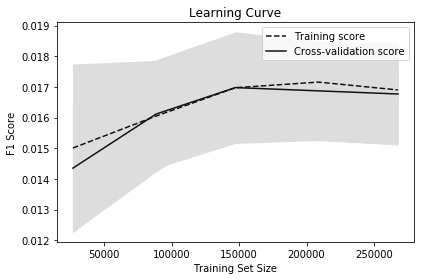

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91     69541
           1       0.62      0.01      0.02     14117

    accuracy                           0.83     83658
   macro avg       0.73      0.50      0.46     83658
weighted avg       0.80      0.83      0.76     83658



In [0]:
LR_l1=LogisticRegression(penalty='l1', solver='liblinear',n_jobs=3,max_iter=10000)

train_sizes, train_scores, test_scores=learning_curve(LR_l1, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='f1', 
                                                      exploit_incremental_learning=False, n_jobs=3, 
                                                      verbose=1, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')



get_learning_curve(train_sizes,train_scores,test_scores)
fit_predict(LR_l1,X_train,y_train,X_test,y_test)

[learning_curve] Training set sizes: [ 26770  88341 147236 208807 267702]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:   59.7s finished


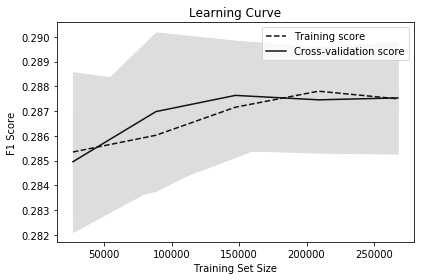

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.85      0.57      0.68     69541
           1       0.20      0.53      0.29     14117

    accuracy                           0.56     83658
   macro avg       0.53      0.55      0.48     83658
weighted avg       0.74      0.56      0.62     83658



In [0]:
LR_l1_balanced_class_w=LogisticRegression(penalty='l1',class_weight='balanced', solver='liblinear',n_jobs=3,max_iter=10000)

train_sizes, train_scores, test_scores=learning_curve(LR_l1_balanced_class_w, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='f1', 
                                                      exploit_incremental_learning=False, n_jobs=3, 
                                                      verbose=1, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')



get_learning_curve(train_sizes,train_scores,test_scores)
fit_predict(LR_l1_balanced_class_w,X_train,y_train,X_test,y_test)

[learning_curve] Training set sizes: [ 26770  88341 147236 208807 267702]


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:   49.2s finished


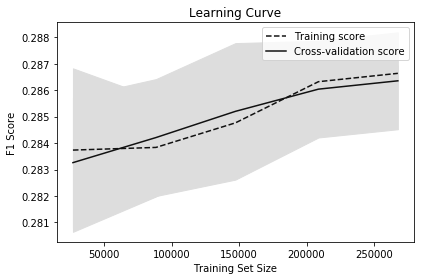

In [0]:
LR_l2_balanced_class_w=LogisticRegression(penalty='l2',class_weight='balanced', solver='liblinear',n_jobs=3,max_iter=10000)

train_sizes, train_scores, test_scores=learning_curve(LR_l2_balanced_class_w, X_train, y_train.to_numpy().ravel(), groups=None, train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
               cv=skfold, scoring='f1', exploit_incremental_learning=False, n_jobs=3, 
               verbose=1, shuffle=True, random_state=42, 
               error_score='raise-deprecating')



get_learning_curve(train_sizes,train_scores,test_scores):

In [0]:
fit_predict(LR_l2_balanced_class_w,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.85      0.56      0.67     69541
           1       0.20      0.53      0.29     14117

    accuracy                           0.55     83658
   macro avg       0.52      0.54      0.48     83658
weighted avg       0.74      0.55      0.61     83658



[learning_curve] Training set sizes: [ 26770  88341 147236 208807 267702]


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:  1.0min finished


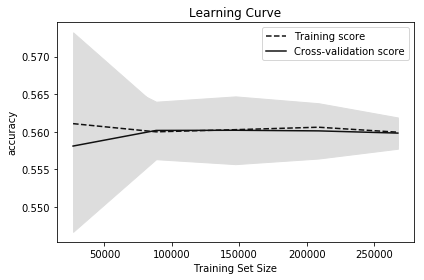

============Held Out Test Set Stats====================


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


              precision    recall  f1-score   support

           0       0.85      0.57      0.68     69541
           1       0.20      0.53      0.29     14117

    accuracy                           0.56     83658
   macro avg       0.53      0.55      0.48     83658
weighted avg       0.74      0.56      0.62     83658



In [0]:
LR_l1_auto_w=LogisticRegression(penalty='l1',C=1.0,class_weight='balanced', solver='liblinear',n_jobs=5,max_iter=10000)

train_sizes, train_scores, test_scores=learning_curve(LR_l1_auto_w, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=5, 
                                                      verbose=1, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')



get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
fit_predict(LR_l1_auto_w,X_train,y_train,X_test,y_test)

In [0]:
def get_p_r_curve(model,X_train,y_train,X_test,y_test):
  pred_y=model.predict(X_test) 

  probs_y=model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

  
  precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
  1]) 
     #retrieve probability of being 1(in second column of probs_y)
  pr_auc = auc(recall, precision)

  plt.title("Precision-Recall vs Threshold Chart")
  plt.plot(thresholds, precision[: -1], "b--", label="Precision")
  plt.plot(thresholds, recall[: -1], "r--", label="Recall")
  plt.ylabel("Precision, Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="lower left")
  plt.ylim([0,1])

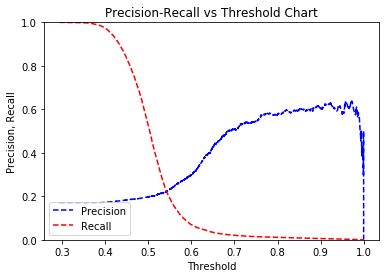

In [0]:
get_p_r_curve(LR_l1_auto_w,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


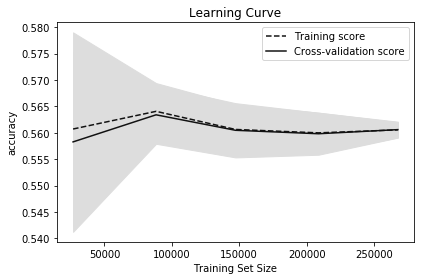

============Held Out Test Set Stats====================


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   49.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   49.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


              precision    recall  f1-score   support

           0       0.85      0.57      0.69     69541
           1       0.20      0.52      0.29     14117

    accuracy                           0.56     83658
   macro avg       0.53      0.55      0.49     83658
weighted avg       0.74      0.56      0.62     83658

============Precision Recall Curve for various thresholds====================


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


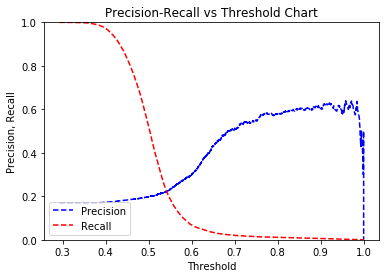

In [0]:
LR=LogisticRegression(penalty='l1',C=1.0,class_weight='balanced', solver='liblinear',n_jobs=1,max_iter=10000)
LR_bag=BaggingClassifier(base_estimator=LR, n_estimators=10, max_samples=0.90, bootstrap=True,n_jobs=-1,
                  random_state=42, verbose=1)

train_sizes, train_scores, test_scores=learning_curve(LR_bag, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
fit_predict(LR_bag,X_train,y_train,X_test,y_test)
print('============Precision Recall Curve for various thresholds====================')
get_p_r_curve(LR_bag,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


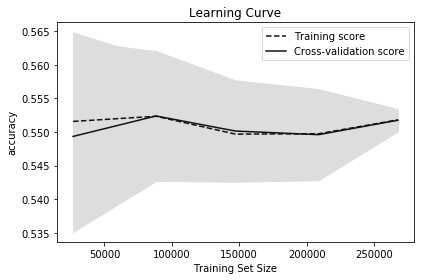

============Held Out Test Set Stats====================


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   43.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   43.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished


              precision    recall  f1-score   support

           0       0.85      0.56      0.68     69541
           1       0.20      0.53      0.29     14117

    accuracy                           0.55     83658
   macro avg       0.52      0.54      0.48     83658
weighted avg       0.74      0.55      0.61     83658

============Precision Recall Curve for various thresholds====================


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


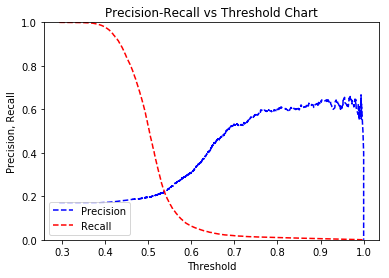

In [0]:
LR_l2=LogisticRegression(penalty='l2',C=1.0,class_weight='balanced', solver='liblinear',n_jobs=1,max_iter=10000)
LR_l2_bag=BaggingClassifier(base_estimator=LR_l2, n_estimators=10, max_samples=0.90, bootstrap=True,n_jobs=-1,
                  random_state=42, verbose=1)

train_sizes, train_scores, test_scores=learning_curve(LR_l2_bag, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
fit_predict(LR_l2_bag,X_train,y_train,X_test,y_test)
print('============Precision Recall Curve for various thresholds====================')
get_p_r_curve(LR_l2_bag,X_train,y_train,X_test,y_test)

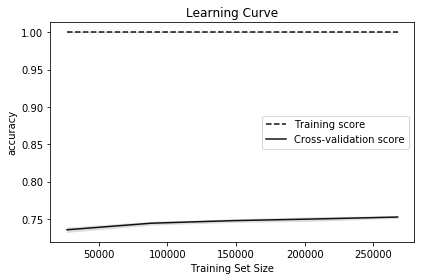

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     69541
           1       0.27      0.27      0.27     14117

    accuracy                           0.75     83658
   macro avg       0.56      0.56      0.56     83658
weighted avg       0.75      0.75      0.75     83658



In [0]:
DT=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                             random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, class_weight='balanced', presort=False)


train_sizes, train_scores, test_scores=learning_curve(DT, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
model_DT=fit_predict(DT,X_train,y_train,X_test,y_test)


In [0]:
model_DT.get_n_leaves()

54690

In [0]:
train_f, validation_f, train_l, validation_l = train_test_split(X_train,y_train, test_size=0.20, 
                                                    random_state=42,stratify=y_train['target'].to_list())

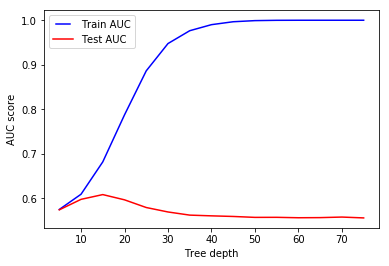

In [0]:
max_depths = np.linspace(5, 75, 15)
train_results = []
test_results = []
for max_depth in max_depths:
  dt = DecisionTreeClassifier(max_depth=max_depth,class_weight='balanced')
  dt.fit(train_f, train_l)
  train_pred = dt.predict(train_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_l, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(validation_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_l, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

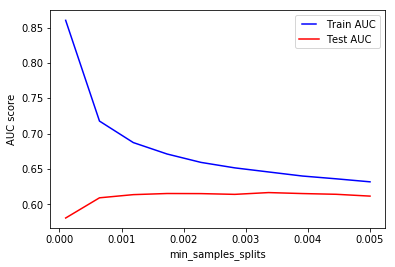

In [0]:
min_samples_splits = np.linspace(0.0001, 0.005, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
  dt = DecisionTreeClassifier(min_samples_split=min_samples_split,class_weight='balanced')
  dt.fit(train_f, train_l)
  train_pred = dt.predict(train_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_l, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(validation_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_l, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_splits')
plt.show()

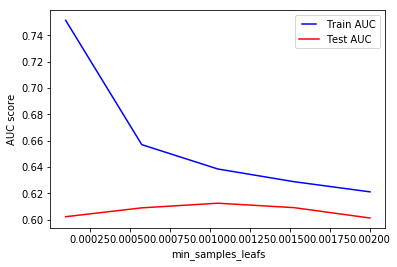

In [0]:
min_samples_leafs = np.linspace(0.0001, 0.002, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
  dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf,class_weight='balanced')
  dt.fit(train_f, train_l)
  train_pred = dt.predict(train_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_l, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(validation_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_l, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leafs')
plt.show()

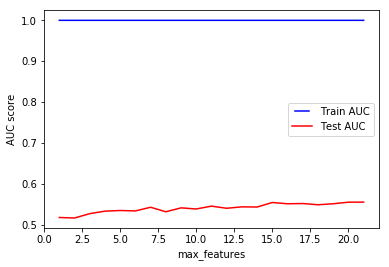

In [0]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
  dt = DecisionTreeClassifier(max_features=max_feature,class_weight='balanced')
  dt.fit(train_f, train_l)
  train_pred = dt.predict(train_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(train_l, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(validation_f)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(validation_l, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
  test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

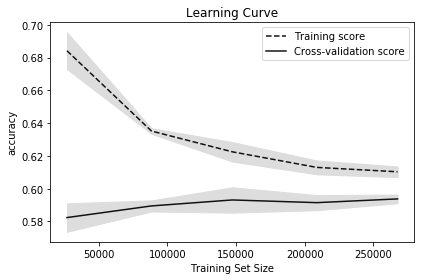

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.89      0.57      0.70     69541
           1       0.24      0.65      0.35     14117

    accuracy                           0.59     83658
   macro avg       0.56      0.61      0.52     83658
weighted avg       0.78      0.59      0.64     83658



In [0]:
DT = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=0.001,min_samples_split=0.001,max_depth=30,random_state=42)

train_sizes, train_scores, test_scores=learning_curve(DT, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
DT_model=fit_predict(DT,X_train,y_train,X_test,y_test)

In [0]:
pickle.dump(DT_model, open('DT_model', 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


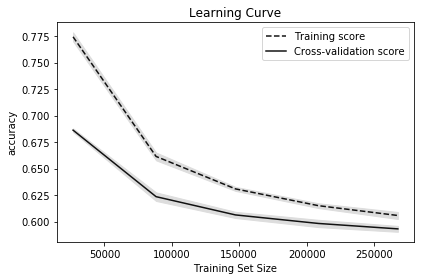

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.88      0.58      0.70     69541
           1       0.23      0.62      0.34     14117

    accuracy                           0.59     83658
   macro avg       0.56      0.60      0.52     83658
weighted avg       0.77      0.59      0.64     83658



In [0]:
RF=RandomForestClassifier(n_estimators=10, bootstrap=True,n_jobs=-1,min_samples_leaf=0.001,min_samples_split=0.001,
                          max_depth=30, random_state=42, class_weight="balanced_subsample")

train_sizes, train_scores, test_scores=learning_curve(RF, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
RF_model=fit_predict(RF,X_train,y_train,X_test,y_test)
pickle.dump(RF_model, open('RF_model', 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


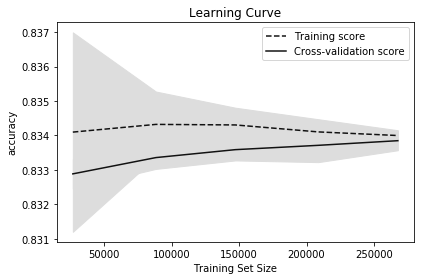

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     69541
           1       0.84      0.02      0.04     14117

    accuracy                           0.83     83658
   macro avg       0.83      0.51      0.48     83658
weighted avg       0.83      0.83      0.76     83658



In [0]:
GB=GradientBoostingClassifier(validation_fraction=0.2, n_iter_no_change=3,random_state=42)
train_sizes, train_scores, test_scores=learning_curve(GB, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
GB_model=fit_predict(GB,X_train,y_train,X_test,y_test)
pickle.dump(GB_model, open('GB_model', 'wb'))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


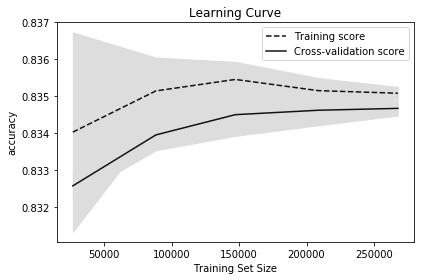

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     69541
           1       0.80      0.03      0.06     14117

    accuracy                           0.84     83658
   macro avg       0.82      0.52      0.49     83658
weighted avg       0.83      0.84      0.77     83658



In [18]:
GB_v2=GradientBoostingClassifier(n_estimators=50,validation_fraction=0.2, n_iter_no_change=5,
                                 min_samples_split=0.001,min_samples_leaf=0.001,max_depth=30,
                                 random_state=42,tol=0.01,)
train_sizes, train_scores, test_scores=learning_curve(GB_v2, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='accuracy', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'accuracy')

print('============Held Out Test Set Stats====================')
GB_model_v2=fit_predict(GB_v2,X_train,y_train,X_test,y_test)
pickle.dump(GB_model_v2, open('GB_model_v2', 'wb'))

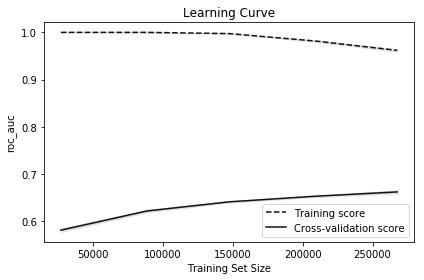

============Held Out Test Set Stats====================
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     69541
           1       0.28      0.44      0.34     14117

    accuracy                           0.72     83658
   macro avg       0.58      0.60      0.58     83658
weighted avg       0.77      0.72      0.74     83658



In [19]:
DT_ada = DecisionTreeClassifier(class_weight='balanced',min_samples_leaf=0.001,
                            min_samples_split=0.001,max_depth=30,random_state=42)
DT_adaBoost=AdaBoostClassifier(base_estimator=DT_ada,random_state=42)
train_sizes, train_scores, test_scores=learning_curve(DT_adaBoost, X_train, 
                                                      y_train.to_numpy().ravel(), groups=None, 
                                                      train_sizes=array([0.1, 0.33, 0.55, 0.78, 1. ]), 
                                                      cv=skfold, scoring='roc_auc', 
                                                      exploit_incremental_learning=False, n_jobs=-1, 
                                                      verbose=0, shuffle=True, random_state=42, 
                                                      error_score='raise-deprecating')

get_learning_curve(train_sizes,train_scores,test_scores,'roc_auc')

print('============Held Out Test Set Stats====================')
DT_adaBoost_model=fit_predict(DT_adaBoost,X_train,y_train,X_test,y_test)
pickle.dump(DT_adaBoost_model, open('DT_adaBoost_model', 'wb'))

### Over Sampling

In [0]:
y_train[y_train['target']==1].count()

target    56466
dtype: int64

In [0]:
y_train[y_train['target']==0].count()

target    278163
dtype: int64